## Example: Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scratch.algos.linear import LinearRegression
from scratch.utils.evaluation import *

plt.rcParams["figure.figsize"] = (20, 8)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
n = 500
eps = np.random.normal(loc=0, scale=2.5, size=n).reshape(n, 1)
x0 = np.array([1] * n).reshape(n, 1)  # intercept
x1 = np.random.normal(loc=0, scale=5.6, size=n).reshape(n, 1)
x2 = np.random.normal(loc=2.3, scale=0.6, size=n).reshape(n, 1)
x3 = np.random.gamma(shape=1.1, scale=2, size=n).reshape(n, 1)
x4 = np.random.beta(a=3, b=3, size=n).reshape(n, 1)
X = np.concatenate((x0, x1, x2, x3, x4), axis=1)
y = (7.2 * x0) + (0.41 * x1) + (1.93 * x2) + (2.11 * x3) + (4.2 * x4) + eps
Xtrain = X[:400]
ytrain = y[:400]
Xvalid = X[400:]
yvalid = y[400:]

In [3]:
m = LinearRegression(learning_rate=0.01, tol_err=1e-06)
m.fit(X=Xtrain, y=ytrain)
yhat = m.predict(X=Xvalid)

In [4]:
print("Coefficients:\n{}".format(m.coefs))
print("MAE%: {}".format(metric_maep(y=yvalid, yhat=yhat)))
print("RMSE: {}".format(metric_rmse(y=yvalid, yhat=yhat)))

Coefficients:
[[7.4500443 ]
 [0.38482056]
 [1.89611836]
 [2.11164219]
 [4.18357091]]
MAE%: 0.1172
RMSE: 2.6362


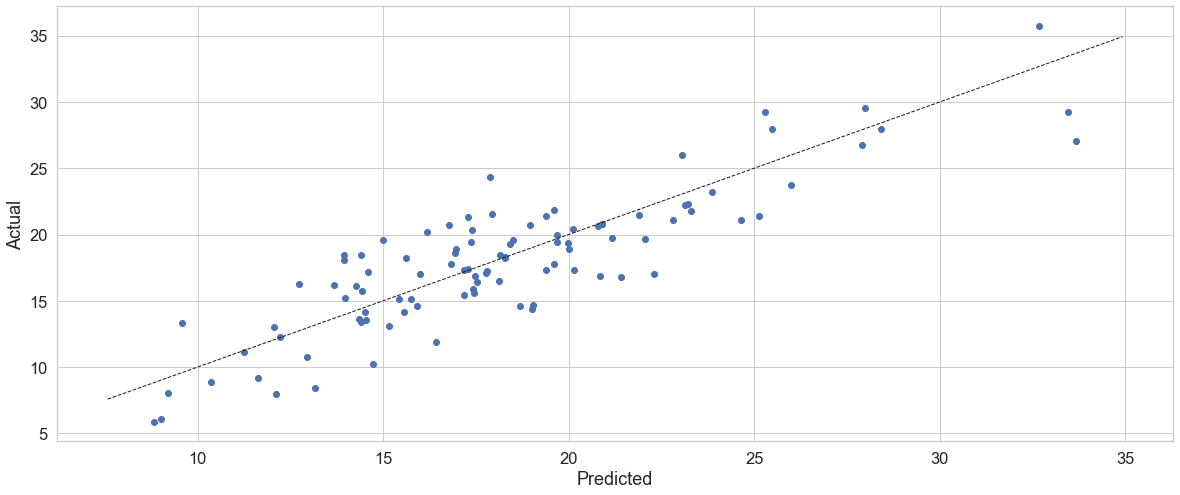

In [5]:
plt.plot(yhat, yvalid, "o")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, ls="--", lw=1, c="k")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

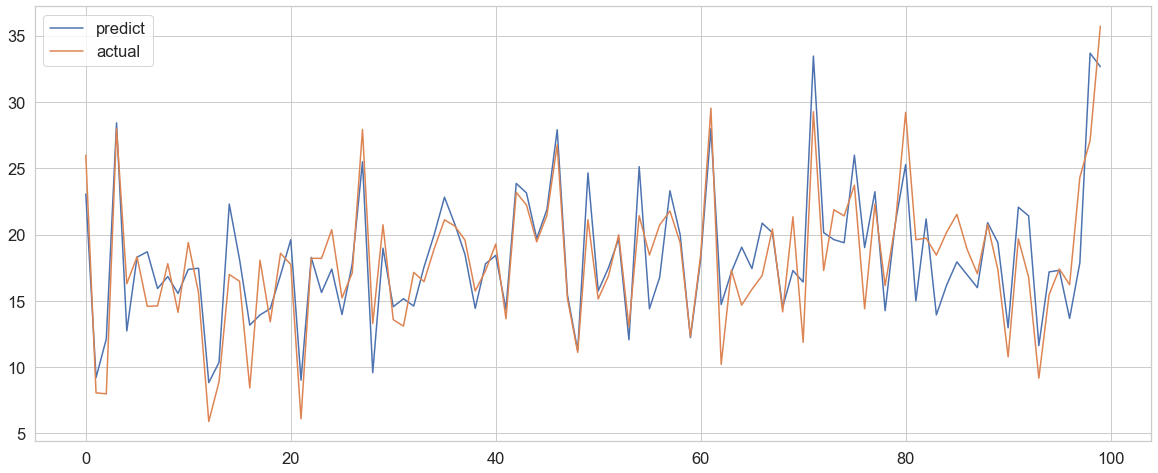

In [6]:
plt.plot(yhat, "-", label="predict")
plt.plot(yvalid, "-", label="actual")
plt.legend()
plt.show()